In [1]:
import pandas as pd
import pandas.io.sql as pd_sql
from psycopg2 import connect
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
params = {
    
    'host':'localhost',
    'user':'andrewway',
    'port':5432,
    'dbname':'ibmhr'
}

connection = connect(**params)
cursor = connection.cursor()

query = '''

select * from hrdataframe;

'''



cursor.execute(query)
pd_sql.read_sql(query, connection)
hrdf = pd_sql.read_sql(query, connection)

In [3]:
hrdf

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
hrdf_raw = hrdf.copy(deep=True)

In [5]:
hrdf['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [6]:
hrdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

# We're in!

Or rather the data is in.  We're looking at HR data from IBM and trying to forecast attrition by considering the reported features

---

From kaggle [https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset]

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’.

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [7]:
hrdf.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
for idx, column in enumerate(hrdf.columns):
        print(hrdf.columns[idx], hrdf[column].unique())

Age [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496

I can't figure out what these "Rate" features are supposed to be measuring and there is no guidance in the documentation.  After a little research, nobody who has worked with this data set has been able to find a clear indication of what this measure is.  Given that the goal of this model is to offer actionable insight, I'm going to drop them because they can't be interpreted without corporate guidance.

In [9]:
hrdf = hrdf.drop(columns=['MonthlyRate','DailyRate','HourlyRate'])

In [10]:
hrdf = hrdf.drop(columns=['Over18','StandardHours','EmployeeCount'])
#these features are all uniform.

I don't know whether or not this data is voluntary or aggregated, but the idea of making recommendations based on age or gender, even in a model throws up like 10,000 red flags in my mind in terms of EEOC.

For a similar reason, I will not be including a count of previous companies.

In [11]:
hrdf = hrdf.drop(columns=['Age','Gender','MaritalStatus','NumCompaniesWorked'])


In [12]:
hrdf.BusinessTravel[hrdf.BusinessTravel == 'Non-Travel'] = 0
hrdf.BusinessTravel[hrdf.BusinessTravel == 'Travel_Rarely'] = 1
hrdf.BusinessTravel[hrdf.BusinessTravel == 'Travel_Frequently'] = 2

hrdf.OverTime[hrdf.OverTime == 'Yes'] = 1
hrdf.OverTime[hrdf.OverTime == 'No'] = 0

hrdf.Attrition[hrdf.Attrition == 'Yes'] = 1
hrdf.Attrition[hrdf.Attrition == 'No'] = 0

hrdf = hrdf.astype({'Attrition': 'int64','BusinessTravel':'int64','OverTime':'int64'})

hrdf

/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,1,Sales,1,2,Life Sciences,1,2,3,2,...,3,1,0,8,0,1,6,4,0,5
1,0,2,Research & Development,8,1,Life Sciences,2,3,2,2,...,4,4,1,10,3,3,10,7,1,7
2,1,1,Research & Development,2,2,Other,4,4,2,1,...,3,2,0,7,3,3,0,0,0,0
3,0,2,Research & Development,3,4,Life Sciences,5,4,3,1,...,3,3,0,8,3,3,8,7,3,0
4,0,1,Research & Development,2,1,Medical,7,1,3,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,2,Research & Development,23,2,Medical,2061,3,4,2,...,3,3,1,17,3,3,5,2,0,3
1466,0,1,Research & Development,6,1,Medical,2062,4,2,3,...,3,1,1,9,5,3,7,7,1,7
1467,0,1,Research & Development,4,3,Life Sciences,2064,2,4,2,...,4,2,1,6,0,3,6,2,0,3
1468,0,2,Sales,2,3,Medical,2065,4,2,2,...,3,4,0,17,3,2,9,6,0,8


In [13]:
hrdf = pd.get_dummies(hrdf,columns=['Department','EducationField','JobRole'])

In [14]:
hrdf

,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,1,1,1,2,1,2,3,2,4,5993,...,0,0,0,0,0,0,0,0,1,0
1,0,2,8,1,2,3,2,2,2,5130,...,0,0,0,0,0,0,0,1,0,0
2,1,1,2,2,4,4,2,1,3,2090,...,0,0,0,1,0,0,0,0,0,0
3,0,2,3,4,5,4,3,1,3,2909,...,0,0,0,0,0,0,0,1,0,0
4,0,1,2,1,7,1,3,1,2,3468,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,2,23,2,2061,3,4,2,4,2571,...,0,0,0,1,0,0,0,0,0,0
1466,0,1,6,1,2062,4,2,3,1,9991,...,0,1,0,0,0,0,0,0,0,0
1467,0,1,4,3,2064,2,4,2,2,6142,...,0,0,0,0,0,1,0,0,0,0
1468,0,2,2,3,2065,4,2,2,2,5390,...,0,0,0,0,0,0,0,0,1,0


In [15]:
hrdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 40 columns):
Attrition                            1470 non-null int64
BusinessTravel                       1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EmployeeNumber                       1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
OverTime                             1470 non-null int64
PercentSalaryHike                    1470 non-null int64
PerformanceRating                    1470 non-null int64
RelationshipSatisfaction             1470 non-null int64
StockOptionLevel                     1470 non-null int64
TotalWorkingYears                    1

In [16]:
hrdf.describe()

,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,1.086395,9.192517,2.912925,1024.865306,2.721769,2.729932,2.063946,2.728571,6502.931293,...,0.089796,0.089116,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463
std,0.367863,0.532170,8.106864,1.024165,602.024335,1.093082,0.711561,1.106940,1.102846,4707.956783,...,0.285986,0.285008,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,2.000000,491.250000,2.000000,2.000000,1.000000,2.000000,2911.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,7.000000,3.000000,1020.500000,3.000000,3.000000,2.000000,3.000000,4919.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,14.000000,4.000000,1555.750000,4.000000,3.000000,3.000000,4.000000,8379.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
hrdf.columns

Index(['Attrition', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research

/Users/andrewway/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/andrewway/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


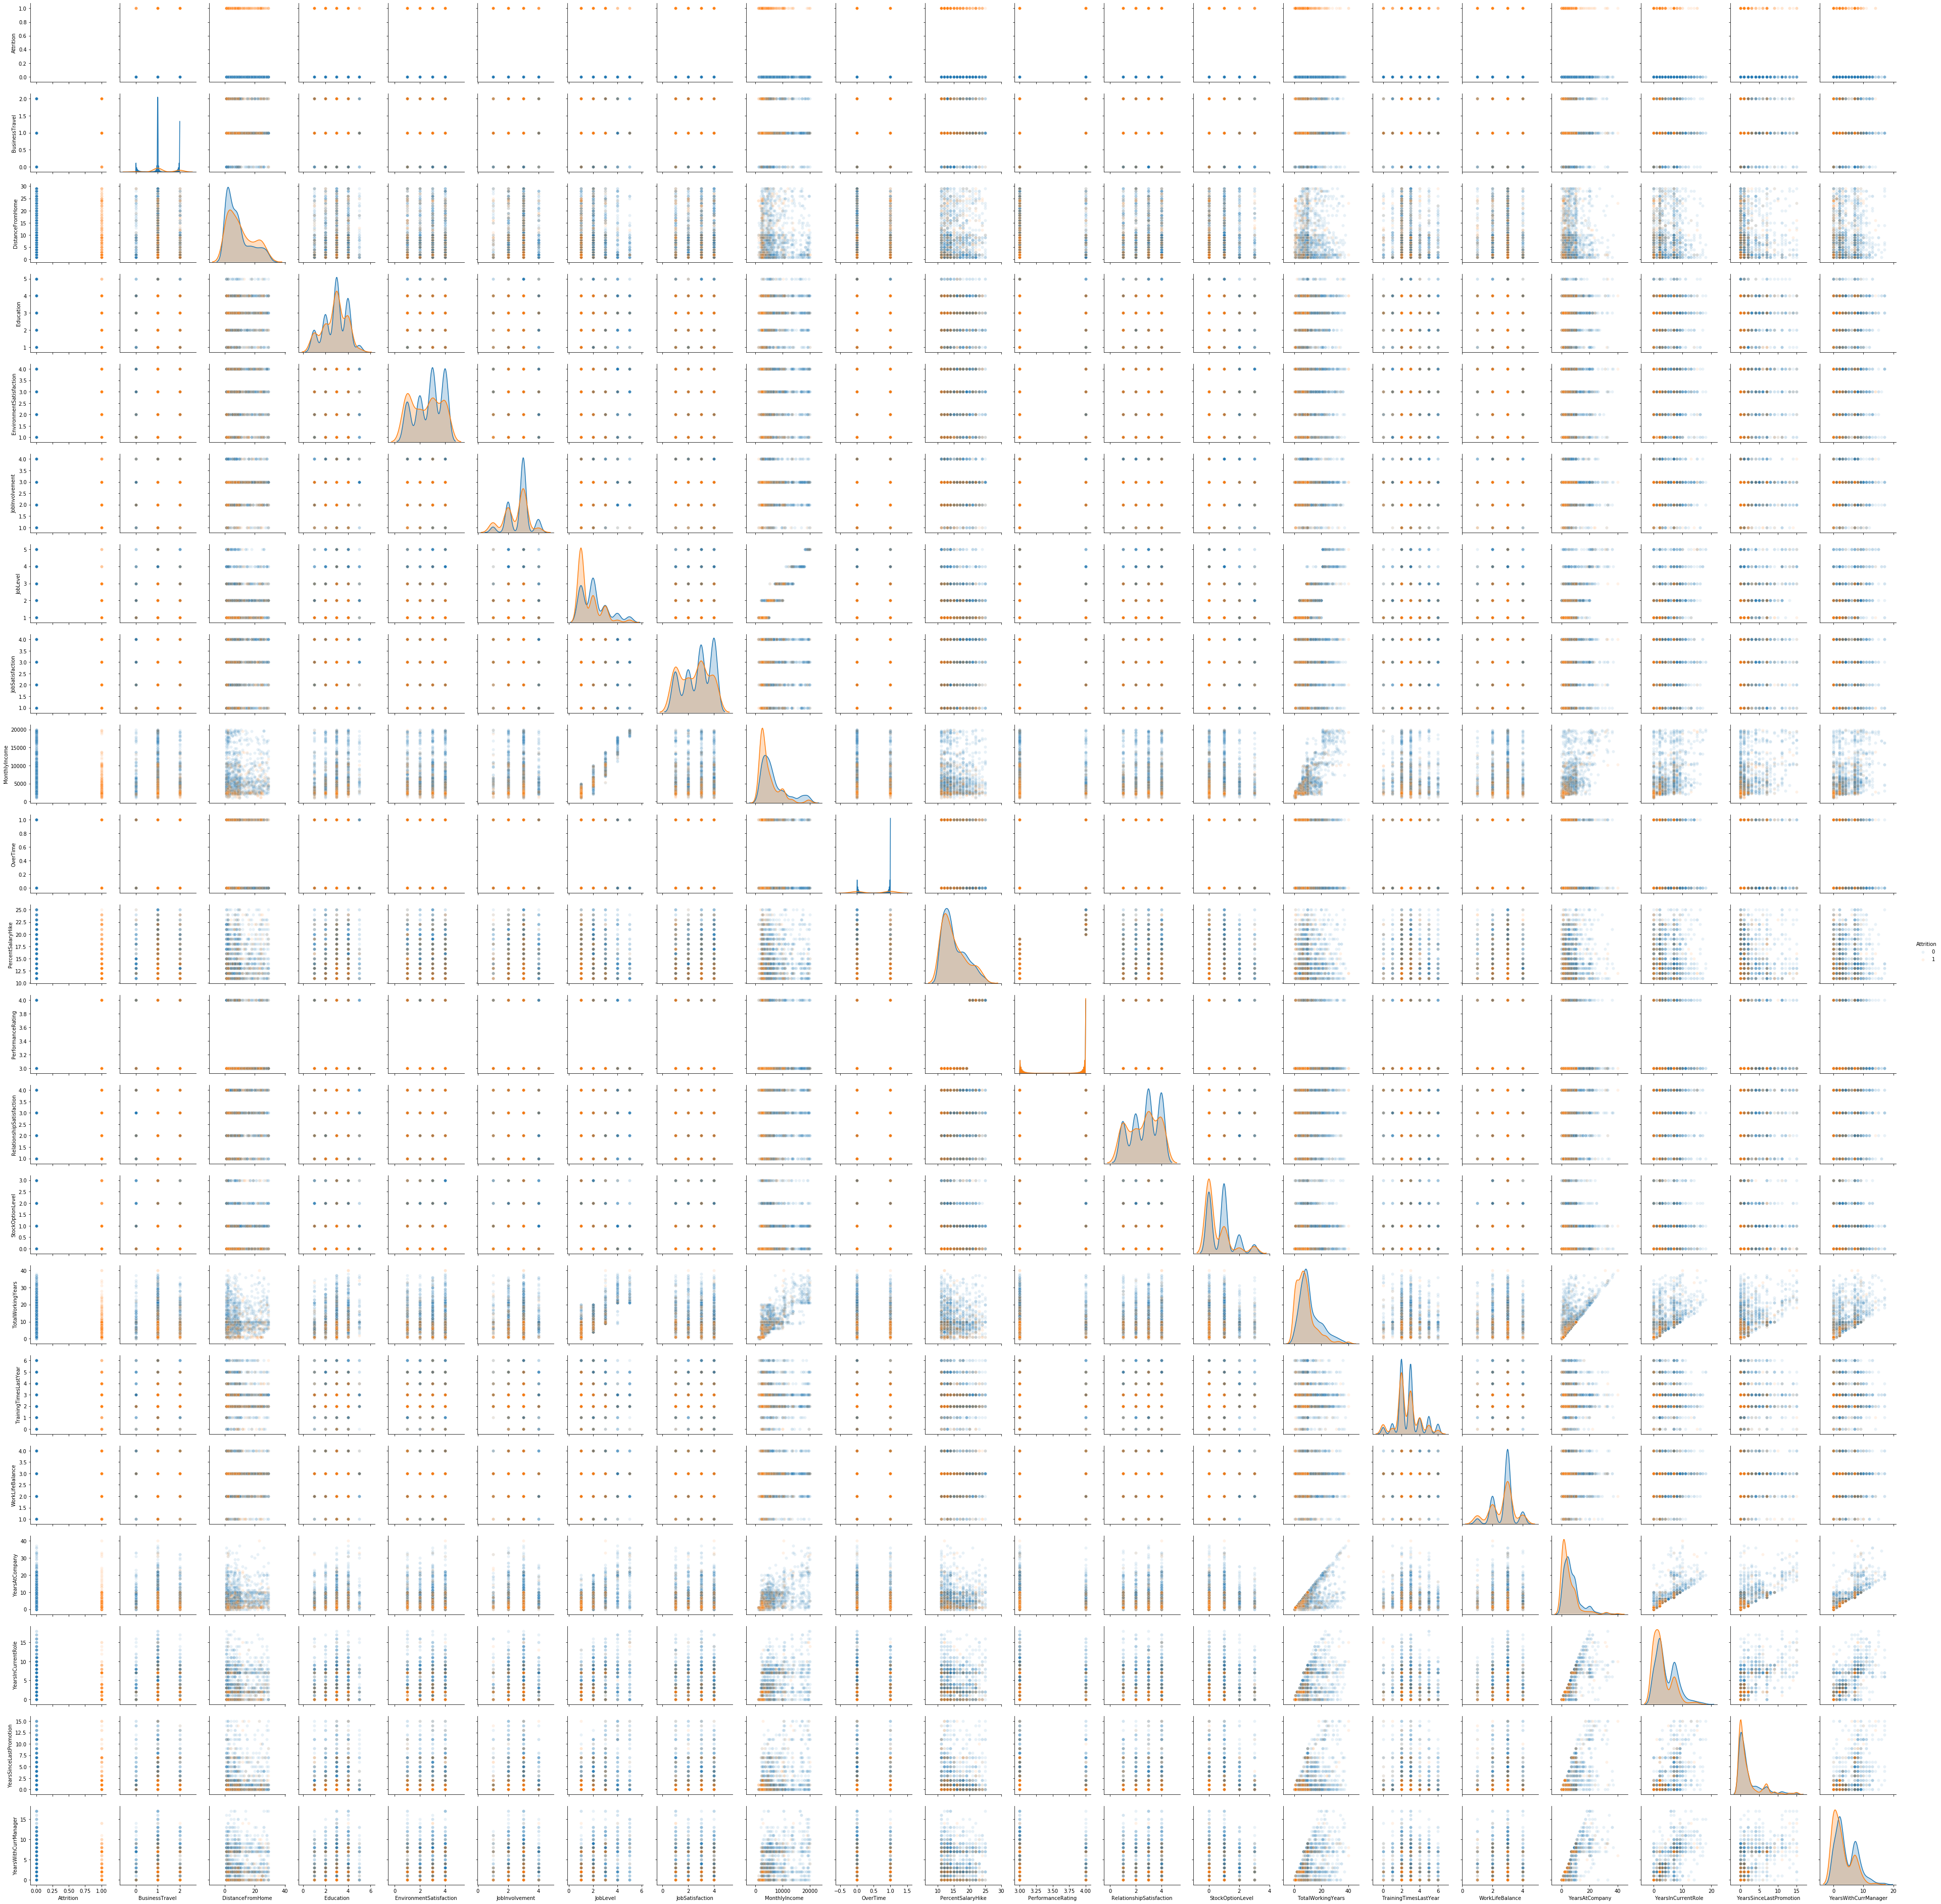

In [27]:
pair = sns.pairplot(hrdf.drop(columns=['EmployeeNumber','Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative']), hue='Attrition', plot_kws={'alpha':0.1})

In [18]:
y = hrdf['Attrition']
X = hrdf.drop(columns=['Attrition','EmployeeNumber'])
print(y.shape, X.shape)

(1470,) (1470, 38)


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = .3,
                                                    shuffle = True,
                                                    random_state=5678,
                                                    stratify=hrdf['Attrition'])

This is our dummy model.

In [21]:
no = len(hrdf[hrdf.Attrition == 0])
yes = len(hrdf[hrdf.Attrition == 1])
print(f'Attrition is "No" likelihood: {no/(no+yes)}')
print(f'Attrition is "Yes" likelihood: {yes/(no+yes)}')

Attrition is "No" likelihood: 0.8387755102040816
Attrition is "Yes" likelihood: 0.16122448979591836


General attrition across America in 2018 was around 19%, so this performance is already above average.

/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8458049886621315


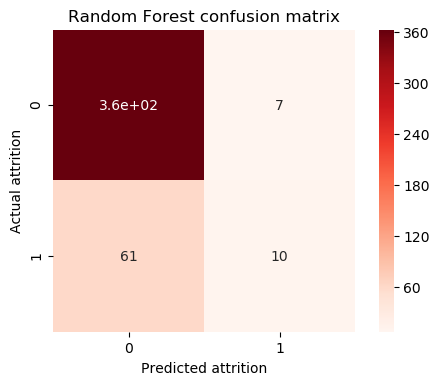

In [22]:
rf = RandomForestClassifier(max_depth=100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

rf_confusion = metrics.confusion_matrix(y_test, rf.predict(X_test))
plt.figure(dpi=100)
sns.heatmap(rf_confusion, cmap=plt.cm.Reds, annot=True, square=True)

plt.xlabel('Predicted attrition')
plt.ylabel('Actual attrition')
plt.title('Random Forest confusion matrix');

In [23]:
for i in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)


    print(f'knn = {i} - accuracy = {metrics.accuracy_score(y_test, y_pred)}')

knn = 1 - accuracy = 0.7664399092970522
knn = 3 - accuracy = 0.7981859410430839
knn = 5 - accuracy = 0.8117913832199547
knn = 7 - accuracy = 0.8276643990929705
knn = 9 - accuracy = 0.8253968253968254
knn = 11 - accuracy = 0.8390022675736961
knn = 13 - accuracy = 0.8367346938775511
knn = 15 - accuracy = 0.8367346938775511
knn = 17 - accuracy = 0.8412698412698413
knn = 19 - accuracy = 0.8321995464852607
knn = 21 - accuracy = 0.8321995464852607
knn = 23 - accuracy = 0.8344671201814059
knn = 25 - accuracy = 0.8344671201814059
knn = 27 - accuracy = 0.8276643990929705
knn = 29 - accuracy = 0.8344671201814059
knn = 31 - accuracy = 0.8344671201814059
knn = 33 - accuracy = 0.8344671201814059
knn = 35 - accuracy = 0.8367346938775511
knn = 37 - accuracy = 0.8367346938775511
knn = 39 - accuracy = 0.8412698412698413
knn = 41 - accuracy = 0.8412698412698413
knn = 43 - accuracy = 0.8367346938775511
knn = 45 - accuracy = 0.8390022675736961
knn = 47 - accuracy = 0.8390022675736961
knn = 49 - accuracy =

0.8412698412698413


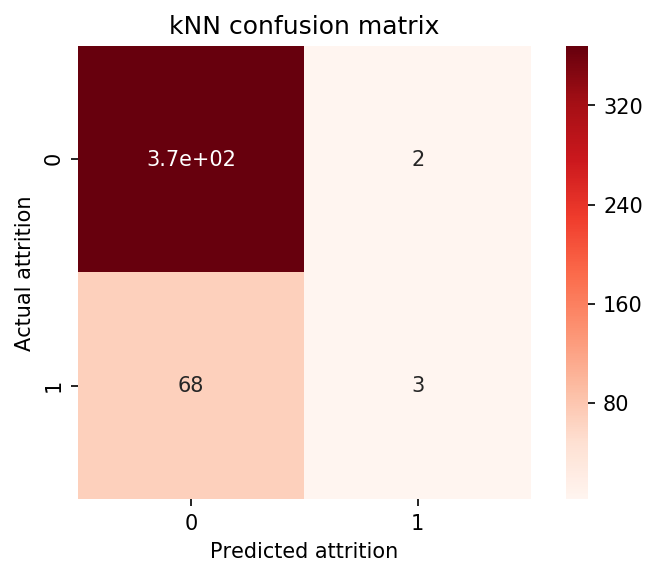

In [24]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)

knn_confusion = metrics.confusion_matrix(y_test, knn.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Reds, annot=True, square=True)

plt.xlabel('Predicted attrition')
plt.ylabel('Actual attrition')
plt.title('kNN confusion matrix');

0.7709750566893424


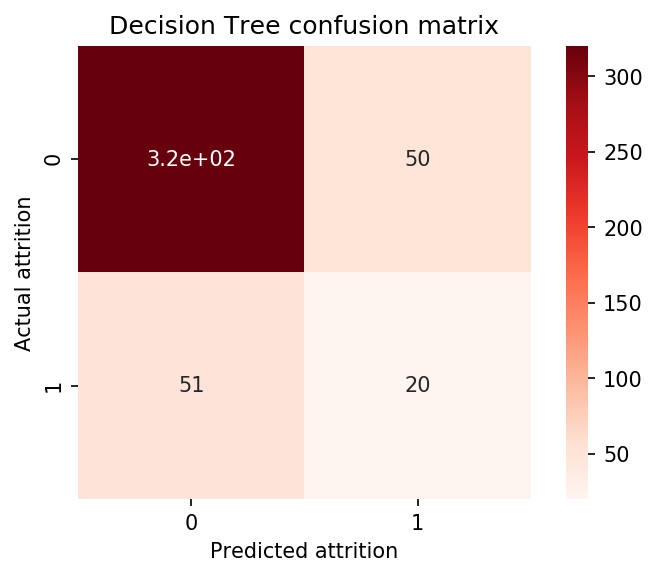

In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
metrics.accuracy_score(y_test, y_pred)
print(metrics.accuracy_score(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)

dt_confusion = metrics.confusion_matrix(y_test, dt.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(dt_confusion, cmap=plt.cm.Reds, annot=True, square=True)

plt.xlabel('Predicted attrition')
plt.ylabel('Actual attrition')
plt.title('Decision Tree confusion matrix');

In [26]:
logr = LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)

0.8662131519274376


/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[357,  13],
       [ 46,  25]])

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve

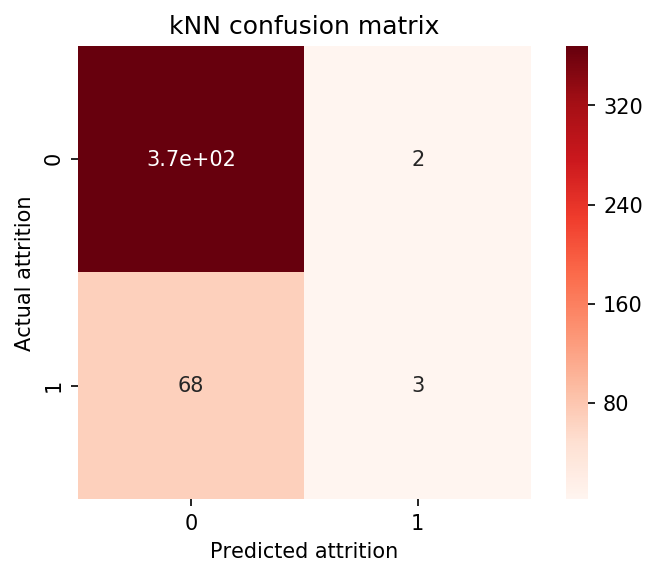

In [28]:
knn_confusion = metrics.confusion_matrix(y_test, knn.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Reds, annot=True, square=True)

plt.xlabel('Predicted attrition')
plt.ylabel('Actual attrition')
plt.title('kNN confusion matrix');

So at this point, none of these models are great.  My classes are pretty severely imbalanced and I think that is affecting my outcomes.

It's worth noting that there's a strong survivor bias in this dataset.  People can't un-quit once they've quit, but we can use the faction taht has left to tell us who seems to be at high risk.

In [29]:
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.
/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

In [30]:
ros = RandomOverSampler(random_state=5678)
X_resampled_train, y_resampled_train = ros.fit_sample(X_train,y_train)

In [31]:
X_resampled_train.shape

(1726, 38)

In [32]:
y_resampled_train.shape

(1726,)

knn = 1 - accuracy = 0.7664399092970522, 
knn = 3 - accuracy = 0.691609977324263, 
knn = 5 - accuracy = 0.6394557823129252, 
knn = 7 - accuracy = 0.6031746031746031, 
knn = 9 - accuracy = 0.5986394557823129, 
knn = 11 - accuracy = 0.5873015873015873, 
knn = 13 - accuracy = 0.5941043083900227, 
knn = 15 - accuracy = 0.5895691609977324, 
knn = 17 - accuracy = 0.5918367346938775, 
knn = 19 - accuracy = 0.5668934240362812, 
knn = 21 - accuracy = 0.6031746031746031, 
knn = 23 - accuracy = 0.6349206349206349, 
knn = 25 - accuracy = 0.6462585034013606, 
knn = 27 - accuracy = 0.6258503401360545, 
knn = 29 - accuracy = 0.6394557823129252, 
knn = 31 - accuracy = 0.6281179138321995, 
knn = 33 - accuracy = 0.6394557823129252, 
knn = 35 - accuracy = 0.6258503401360545, 
knn = 37 - accuracy = 0.6281179138321995, 
knn = 39 - accuracy = 0.6281179138321995, 
knn = 41 - accuracy = 0.6167800453514739, 
knn = 43 - accuracy = 0.6167800453514739, 
knn = 45 - accuracy = 0.6031746031746031, 
knn = 47 - accura

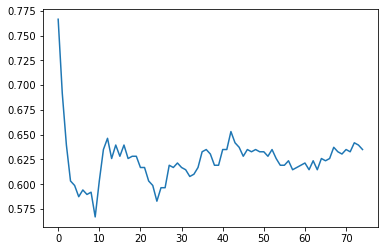

In [33]:
knn_list = []
for i in range(1,150,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_resampled_train, y_resampled_train)
    y_pred = knn.predict(X_test)
    knn_list.append(metrics.accuracy_score(y_test,y_pred))
    print(f'''knn = {i} - accuracy = {metrics.accuracy_score(y_test, y_pred)}, ''')
    
plt.plot(knn_list)

I still don't love this, so I'm going to do a kitchen-sink style thing and just run 6 uncalibrated models to see if any of them show promise.

In [34]:
def run_models(X, y):
    Logistic_Regression = LogisticRegression(solver= 'liblinear', C=1000)
    K_Nearest_Neighbors = KNeighborsClassifier()
    Naive_Bayes = GaussianNB()
    SVM = SVC(gamma = 'auto', probability = True)
    Decision_Tree = DecisionTreeClassifier()
    Random_Forest = RandomForestClassifier(n_estimators = 100)
    scores = pd.DataFrame(index=['Accuracy','Precision','Recall', 'F1','AUC'])
    models = [Logistic_Regression, K_Nearest_Neighbors, Naive_Bayes, SVM, Decision_Tree, Random_Forest]
    scores_col = {Logistic_Regression:'Logistic Regression',
                  K_Nearest_Neighbors:'KNN',
                  Naive_Bayes:'Naive Bayes',
                  SVM:'SVM',
                  Decision_Tree:'Decision Tree',
                  Random_Forest:'Random Forest'}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 5678)
    for model, col_name in scores_col.items():
        model_scores = [] # accuracy, precision, recall, f1
        model.fit(X_train, y_train)
        model_scores.append(model.score(X_test, y_test)) # accuracy
        y_pred = model.predict(X_test)
        model_scores.append(metrics.precision_score(y_test, y_pred)) # precision
        model_scores.append(metrics.recall_score(y_test, y_pred)) # recall
        model_scores.append(metrics.f1_score(y_test, y_pred)) # f1
        model_scores.append(metrics.roc_auc_score(y_test,y_pred))
        scores[scores_col[model]] = model_scores
        pd.set_option('precision', 4)
#         fpr_{col_name}, tpr_{col_name}, thresholds_{col_name} = roc_curve(y_test, model.predict_proba(X_test)[:,1])
#         plt.plot(fpr_{col_name}, tpr_{col_name},lw=2)
#         plt.plot([0,1],[0,1],c='violet',ls='--')
#         plt.xlim([-0.05,1.05])
#         plt.ylim([-0.05,1.05])
#         plt.xlabel('False positive rate')
#         plt.ylabel('True positive rate')
#         plt.title(f'ROC curve')
#         plt.legend(scores_col);
    return scores

In [36]:
run_models(X_resampled_train,y_resampled_train)

,Logistic Regression,KNN,Naive Bayes,SVM,Decision Tree,Random Forest
Accuracy,0.7688,0.7746,0.6994,0.9942,0.9249,0.9827
Precision,0.7471,0.6930,0.6422,1.0000,0.8723,0.9651
Recall,0.7831,0.9518,0.8434,0.9880,0.9880,1.0000
F1,0.7647,0.8020,0.7292,0.9939,0.9266,0.9822
AUC,0.7693,0.7815,0.7050,0.9940,0.9273,0.9833


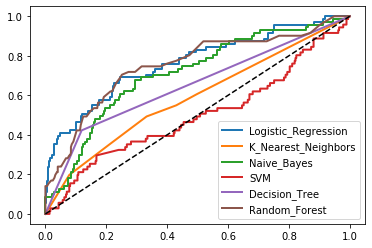

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve

Logistic_Regression = LogisticRegression(solver= 'liblinear', C=1000)
K_Nearest_Neighbors = KNeighborsClassifier()
Naive_Bayes = GaussianNB()
SVM = SVC(gamma = 'auto', probability = True)
Decision_Tree = DecisionTreeClassifier()
Random_Forest = RandomForestClassifier(n_estimators = 100)

models = [Logistic_Regression, K_Nearest_Neighbors, Naive_Bayes, SVM, Decision_Tree, Random_Forest]
for model in models:
    model.fit(X_resampled_train,y_resampled_train)
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr,lw=2)
    

plt.plot([0,1],[0,1],c='black',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend(['Logistic_Regression', 'K_Nearest_Neighbors', 'Naive_Bayes', 'SVM', 'Decision_Tree', 'Random_Forest']);

Quite telling!  Right out of the gate, the Logistic Regression runs quite well, as does the Random Forest and Naive Bayes.  Since I'm really focused on making my outcomes actionable, I'm going to focus on the Logistic and RF because I can draw insight from the coefficients and their feature importances.

/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


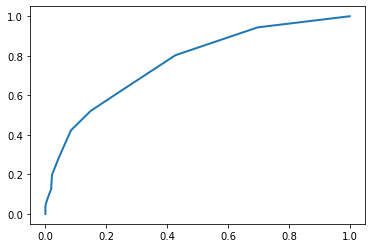

In [38]:
rf = RandomForestClassifier()
rf.fit(X_resampled_train,y_resampled_train)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr,lw=2)

I love that at a 40% threshold of probability certainty, we're capturing about 80% of the whole sample.  It's estimated that around 25% of attritions are unpreventable (relocation, life change, retirement, etc), but the other 75% are more easily influenced.  I'll be using that 75% metric to gauge my models.

In [39]:
sorted(list(zip(rf.feature_importances_,X.columns)),reverse=True)

[(0.09221310066336022, 'OverTime'),
 (0.08673943330551868, 'MonthlyIncome'),
 (0.06852331362644207, 'JobLevel'),
 (0.05616744073690535, 'DistanceFromHome'),
 (0.05313141171894592, 'TotalWorkingYears'),
 (0.0512692431097701, 'StockOptionLevel'),
 (0.04936419333285751, 'YearsAtCompany'),
 (0.04195783363591281, 'PercentSalaryHike'),
 (0.041592720509267614, 'RelationshipSatisfaction'),
 (0.040196143644127935, 'YearsWithCurrManager'),
 (0.03678120806238479, 'YearsInCurrentRole'),
 (0.032608724423585166, 'JobInvolvement'),
 (0.03139287284730158, 'EnvironmentSatisfaction'),
 (0.03138320135784174, 'JobSatisfaction'),
 (0.030943831638279323, 'Education'),
 (0.02986265142471987, 'WorkLifeBalance'),
 (0.02873014755670284, 'BusinessTravel'),
 (0.028546636690304612, 'YearsSinceLastPromotion'),
 (0.028103480430881105, 'TrainingTimesLastYear'),
 (0.015601188999947415, 'JobRole_Sales Executive'),
 (0.015284263770767706, 'JobRole_Sales Representative'),
 (0.013537885520141438, 'Department_Sales'),
 (0.

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
ss = StandardScaler()

In [42]:
X_re_tr_scaled = ss.fit_transform(X_resampled_train)
X_te_scaled = ss.transform(X_test)

0.7414965986394558 0.3383458646616541 0.6338028169014085


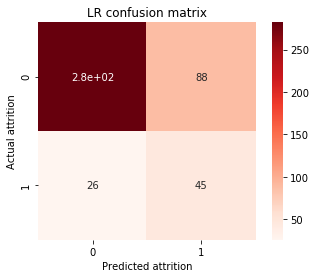

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

Logistic_Regression = LogisticRegression(solver='liblinear')
Logistic_Regression.fit(X_re_tr_scaled,y_resampled_train)
y_pred = Logistic_Regression.predict(X_te_scaled)
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test,y_pred))
LRconf = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(LRconf, cmap=plt.cm.Reds, annot=True, square=True)

plt.xlabel('Predicted attrition')
plt.ylabel('Actual attrition')
plt.title('LR confusion matrix');

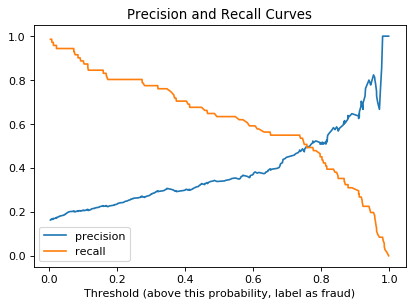

In [44]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

precision_curve, recall_curve, threshold_curve = \
precision_recall_curve(y_test, Logistic_Regression.predict_proba(X_te_scaled)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

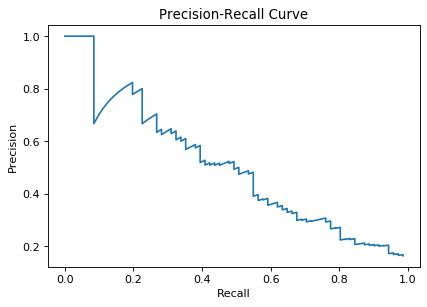

In [45]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [46]:
Logistic_Regression.predict_proba(X_te_scaled)

array([[6.87185771e-01, 3.12814229e-01],
       [7.62898842e-01, 2.37101158e-01],
       [5.78124224e-01, 4.21875776e-01],
       [1.95652627e-01, 8.04347373e-01],
       [3.91677659e-02, 9.60832234e-01],
       [2.42454378e-01, 7.57545622e-01],
       [8.98158312e-01, 1.01841688e-01],
       [9.93384961e-01, 6.61503946e-03],
       [8.97619648e-01, 1.02380352e-01],
       [9.57199312e-01, 4.28006877e-02],
       [3.46770591e-01, 6.53229409e-01],
       [7.98776692e-01, 2.01223308e-01],
       [3.20839561e-01, 6.79160439e-01],
       [8.77558221e-01, 1.22441779e-01],
       [9.00267104e-02, 9.09973290e-01],
       [5.42429768e-01, 4.57570232e-01],
       [9.21424378e-01, 7.85756218e-02],
       [9.78261971e-01, 2.17380292e-02],
       [5.87881802e-01, 4.12118198e-01],
       [3.41357397e-02, 9.65864260e-01],
       [8.45186515e-01, 1.54813485e-01],
       [7.49619401e-01, 2.50380599e-01],
       [5.32819330e-01, 4.67180670e-01],
       [9.44969911e-01, 5.50300894e-02],
       [9.925728

In [48]:
import numpy as np
for i in np.arange(0,1.05,.05):
    y_pred = (Logistic_Regression.predict_proba(X_te_scaled)[:,1] > i)
    print(f'threshold = {i}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(f'accuracy = {metrics.accuracy_score(y_test,y_pred)}')
    print(f'recall = {metrics.recall_score(y_test,y_pred)}')
    print('--------')

threshold = 0.0
[[  0 370]
 [  0  71]]
accuracy = 0.16099773242630386
recall = 1.0
--------
threshold = 0.05
[[ 90 280]
 [  4  67]]
accuracy = 0.35600907029478457
recall = 0.9436619718309859
--------
threshold = 0.1
[[130 240]
 [  8  63]]
accuracy = 0.4376417233560091
recall = 0.8873239436619719
--------
threshold = 0.15000000000000002
[[162 208]
 [ 11  60]]
accuracy = 0.5034013605442177
recall = 0.8450704225352113
--------
threshold = 0.2
[[185 185]
 [ 14  57]]
accuracy = 0.5487528344671202
recall = 0.8028169014084507
--------
threshold = 0.25
[[209 161]
 [ 14  57]]
accuracy = 0.6031746031746031
recall = 0.8028169014084507
--------
threshold = 0.30000000000000004
[[229 141]
 [ 16  55]]
accuracy = 0.6439909297052154
recall = 0.7746478873239436
--------
threshold = 0.35000000000000003
[[248 122]
 [ 17  54]]
accuracy = 0.6848072562358276
recall = 0.7605633802816901
--------
threshold = 0.4
[[253 117]
 [ 21  50]]
accuracy = 0.6870748299319728
recall = 0.704225352112676
--------
threshold 

I'm aiming for a recall score of at least 77% based on a report citing that as a threshold for features that a workplace can influence tha impact retention

In [57]:
len(X.columns)

38

In [77]:
X_te_scaled

array([[-0.26294616, -0.71134694,  0.10945283, ..., -0.48983929,
        -0.5590595 , -0.3229344 ],
       [-0.26294616, -0.10081247, -0.859345  , ..., -0.48983929,
         1.78871836, -0.3229344 ],
       [ 1.52384545,  0.02129442,  1.07825065, ..., -0.48983929,
        -0.5590595 , -0.3229344 ],
       ...,
       [ 1.52384545, -0.95556073,  0.10945283, ..., -0.48983929,
        -0.5590595 , -0.3229344 ],
       [-0.26294616,  0.02129442,  0.10945283, ..., -0.48983929,
        -0.5590595 , -0.3229344 ],
       [-0.26294616,  1.24236336,  0.10945283, ..., -0.48983929,
        -0.5590595 , -0.3229344 ]])

In [49]:
results = pd.DataFrame(X_te_scaled,columns=X.columns)

In [50]:
results

,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,OverTime,PercentSalaryHike,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,-0.2687,-0.3358,1.0689,-0.5697,0.4698,2.9650,-0.5444,3.2034,-0.8131,-0.2945,...,-0.3273,-0.2519,-0.1994,-0.5322,4.5360,-0.2721,-0.2025,-0.4862,-0.5644,-0.3218
1,-0.2687,-0.8285,0.0979,-1.4429,0.4698,1.0742,0.3617,1.6769,-0.8131,-1.1237,...,3.0554,-0.2519,-0.1994,-0.5322,4.5360,-0.2721,-0.2025,-0.4862,-0.5644,-0.3218
2,1.5222,0.0337,1.0689,0.3036,0.4698,2.9650,-1.4506,2.9379,1.2298,-1.1237,...,-0.3273,-0.2519,-0.1994,-0.5322,-0.2205,-0.2721,4.9378,-0.4862,-0.5644,-0.3218
3,1.5222,0.1568,0.0979,1.1768,0.4698,0.1287,0.3617,0.1332,-0.8131,-1.1237,...,3.0554,-0.2519,-0.1994,1.8789,-0.2205,-0.2721,-0.2025,-0.4862,-0.5644,-0.3218
4,-0.2687,1.1422,-0.8732,0.3036,-0.8750,-0.8167,-0.5444,-0.7554,1.2298,0.8111,...,-0.3273,-0.2519,-0.1994,-0.5322,-0.2205,-0.2721,-0.2025,-0.4862,-0.5644,3.1071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,-2.0597,0.0337,-0.8732,0.3036,-2.2198,0.1287,-0.5444,0.0941,-0.8131,-0.5709,...,-0.3273,-0.2519,-0.1994,-0.5322,-0.2205,-0.2721,-0.2025,-0.4862,1.7717,-0.3218
437,-0.2687,-0.9516,1.0689,1.1768,-0.8750,-0.8167,1.2679,-0.5552,1.2298,0.8111,...,-0.3273,-0.2519,-0.1994,-0.5322,-0.2205,-0.2721,-0.2025,-0.4862,-0.5644,3.1071
438,1.5222,-0.9516,0.0979,1.1768,0.4698,2.0196,-1.4506,2.7541,-0.8131,1.9167,...,-0.3273,-0.2519,-0.1994,-0.5322,4.5360,-0.2721,-0.2025,-0.4862,-0.5644,-0.3218
439,-0.2687,0.0337,0.0979,0.3036,-0.8750,-0.8167,-1.4506,-0.9820,-0.8131,-0.5709,...,-0.3273,-0.2519,-0.1994,1.8789,-0.2205,-0.2721,-0.2025,-0.4862,-0.5644,-0.3218


In [51]:
results['ActualAttrition'] = np.array(y_test)

In [52]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 39 columns):
BusinessTravel                       441 non-null float64
DistanceFromHome                     441 non-null float64
Education                            441 non-null float64
EnvironmentSatisfaction              441 non-null float64
JobInvolvement                       441 non-null float64
JobLevel                             441 non-null float64
JobSatisfaction                      441 non-null float64
MonthlyIncome                        441 non-null float64
OverTime                             441 non-null float64
PercentSalaryHike                    441 non-null float64
PerformanceRating                    441 non-null float64
RelationshipSatisfaction             441 non-null float64
StockOptionLevel                     441 non-null float64
TotalWorkingYears                    441 non-null float64
TrainingTimesLastYear                441 non-null float64
WorkLifeBalance          

In [53]:
results['AttritionTrueLikelihood'] = Logistic_Regression.predict_proba(X_te_scaled)[:,1]

In [54]:
results

,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,OverTime,PercentSalaryHike,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,ActualAttrition,AttritionTrueLikelihood
0,-0.2687,-0.3358,1.0689,-0.5697,0.4698,2.9650,-0.5444,3.2034,-0.8131,-0.2945,...,-0.1994,-0.5322,4.5360,-0.2721,-0.2025,-0.4862,-0.5644,-0.3218,0,0.3128
1,-0.2687,-0.8285,0.0979,-1.4429,0.4698,1.0742,0.3617,1.6769,-0.8131,-1.1237,...,-0.1994,-0.5322,4.5360,-0.2721,-0.2025,-0.4862,-0.5644,-0.3218,0,0.2371
2,1.5222,0.0337,1.0689,0.3036,0.4698,2.9650,-1.4506,2.9379,1.2298,-1.1237,...,-0.1994,-0.5322,-0.2205,-0.2721,4.9378,-0.4862,-0.5644,-0.3218,0,0.4219
3,1.5222,0.1568,0.0979,1.1768,0.4698,0.1287,0.3617,0.1332,-0.8131,-1.1237,...,-0.1994,1.8789,-0.2205,-0.2721,-0.2025,-0.4862,-0.5644,-0.3218,0,0.8043
4,-0.2687,1.1422,-0.8732,0.3036,-0.8750,-0.8167,-0.5444,-0.7554,1.2298,0.8111,...,-0.1994,-0.5322,-0.2205,-0.2721,-0.2025,-0.4862,-0.5644,3.1071,1,0.9608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,-2.0597,0.0337,-0.8732,0.3036,-2.2198,0.1287,-0.5444,0.0941,-0.8131,-0.5709,...,-0.1994,-0.5322,-0.2205,-0.2721,-0.2025,-0.4862,1.7717,-0.3218,0,0.8780
437,-0.2687,-0.9516,1.0689,1.1768,-0.8750,-0.8167,1.2679,-0.5552,1.2298,0.8111,...,-0.1994,-0.5322,-0.2205,-0.2721,-0.2025,-0.4862,-0.5644,3.1071,0,0.9538
438,1.5222,-0.9516,0.0979,1.1768,0.4698,2.0196,-1.4506,2.7541,-0.8131,1.9167,...,-0.1994,-0.5322,4.5360,-0.2721,-0.2025,-0.4862,-0.5644,-0.3218,0,0.0290
439,-0.2687,0.0337,0.0979,0.3036,-0.8750,-0.8167,-1.4506,-0.9820,-0.8131,-0.5709,...,-0.1994,1.8789,-0.2205,-0.2721,-0.2025,-0.4862,-0.5644,-0.3218,1,0.8136


In [55]:
results = results[['ActualAttrition','AttritionTrueLikelihood']]

In [56]:
results['YearsWithCurrManager'] = np.array(X_test.YearsWithCurrManager)

/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
results

,ActualAttrition,AttritionTrueLikelihood,YearsWithCurrManager
0,0,0.3128,8
1,0,0.2371,2
2,0,0.4219,2
3,0,0.8043,4
4,1,0.9608,0
...,...,...,...
436,0,0.8780,9
437,0,0.9538,2
438,0,0.0290,2
439,1,0.8136,0


In [58]:
results.to_csv('Results.csv')

This results table will be part of a tableau visualization.

In [59]:
hrdf

,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,1,1,1,2,1,2,3,2,4,5993,...,0,0,0,0,0,0,0,0,1,0
1,0,2,8,1,2,3,2,2,2,5130,...,0,0,0,0,0,0,0,1,0,0
2,1,1,2,2,4,4,2,1,3,2090,...,0,0,0,1,0,0,0,0,0,0
3,0,2,3,4,5,4,3,1,3,2909,...,0,0,0,0,0,0,0,1,0,0
4,0,1,2,1,7,1,3,1,2,3468,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,2,23,2,2061,3,4,2,4,2571,...,0,0,0,1,0,0,0,0,0,0
1466,0,1,6,1,2062,4,2,3,1,9991,...,0,1,0,0,0,0,0,0,0,0
1467,0,1,4,3,2064,2,4,2,2,6142,...,0,0,0,0,0,1,0,0,0,0
1468,0,2,2,3,2065,4,2,2,2,5390,...,0,0,0,0,0,0,0,0,1,0


In [60]:
sorted(list(zip(Logistic_Regression.coef_[0],X.columns)), reverse=True)

[(1.131949991603615, 'OverTime'),
 (0.5992431110222707, 'JobRole_Sales Representative'),
 (0.5901692582208115, 'YearsAtCompany'),
 (0.5355202428173208, 'YearsSinceLastPromotion'),
 (0.5146602003736601, 'JobRole_Human Resources'),
 (0.511253552179726, 'BusinessTravel'),
 (0.39751808742050204, 'DistanceFromHome'),
 (0.2590606371271496, 'Department_Research & Development'),
 (0.256172638117276, 'EducationField_Technical Degree'),
 (0.24717898201287022, 'JobRole_Sales Executive'),
 (0.21032508554764223, 'EducationField_Human Resources'),
 (0.15961458040715135, 'JobRole_Laboratory Technician'),
 (0.03347676071705019, 'JobLevel'),
 (0.009450690304498887, 'EducationField_Marketing'),
 (0.007212150679477853, 'Education'),
 (0.0007596639732952921, 'EducationField_Other'),
 (-0.00620752201895793, 'PercentSalaryHike'),
 (-0.03764729560910261, 'Department_Sales'),
 (-0.1051865115385045, 'EducationField_Medical'),
 (-0.1284117235668927, 'EducationField_Life Sciences'),
 (-0.1383723202923935, 'WorkL

In [61]:
sorted(list(zip(abs(Logistic_Regression.coef_[0]),X.columns)),reverse=True)

[(1.131949991603615, 'OverTime'),
 (0.6280635438447519, 'JobRole_Healthcare Representative'),
 (0.6073243448726297, 'YearsInCurrentRole'),
 (0.5992431110222707, 'JobRole_Sales Representative'),
 (0.5901692582208115, 'YearsAtCompany'),
 (0.5628352772914577, 'StockOptionLevel'),
 (0.5500922494037379, 'YearsWithCurrManager'),
 (0.539123035457183, 'Department_Human Resources'),
 (0.5355202428173208, 'YearsSinceLastPromotion'),
 (0.5346989967314316, 'JobInvolvement'),
 (0.5146602003736601, 'JobRole_Human Resources'),
 (0.5139502086643695, 'EnvironmentSatisfaction'),
 (0.511253552179726, 'BusinessTravel'),
 (0.5042702070171141, 'JobSatisfaction'),
 (0.4327331015417067, 'RelationshipSatisfaction'),
 (0.4198898876671695, 'TrainingTimesLastYear'),
 (0.39751808742050204, 'DistanceFromHome'),
 (0.3425473677587402, 'JobRole_Research Director'),
 (0.28186738396388017, 'JobRole_Research Scientist'),
 (0.26779282108948477, 'JobRole_Manufacturing Director'),
 (0.2590606371271496, 'Department_Research 

In [64]:
hrdf_w_attrition_cost = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [65]:
hrdf_w_attrition_cost['AnnualAttritionCost'] = hrdf_w_attrition_cost['MonthlyIncome']*12*hrdf_w_attrition_cost['JobLevel']*.5

In [66]:
hrdf_w_attrition_cost.to_csv('hrdf_w_attrition_cost.csv')

After doing some data viz, it became clear that there was also a spike in level 3 attrition that I hadn't notice before.  I came back to investigate.

In [62]:
hrdf

,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,1,1,1,2,1,2,3,2,4,5993,...,0,0,0,0,0,0,0,0,1,0
1,0,2,8,1,2,3,2,2,2,5130,...,0,0,0,0,0,0,0,1,0,0
2,1,1,2,2,4,4,2,1,3,2090,...,0,0,0,1,0,0,0,0,0,0
3,0,2,3,4,5,4,3,1,3,2909,...,0,0,0,0,0,0,0,1,0,0
4,0,1,2,1,7,1,3,1,2,3468,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,2,23,2,2061,3,4,2,4,2571,...,0,0,0,1,0,0,0,0,0,0
1466,0,1,6,1,2062,4,2,3,1,9991,...,0,1,0,0,0,0,0,0,0,0
1467,0,1,4,3,2064,2,4,2,2,6142,...,0,0,0,0,0,1,0,0,0,0
1468,0,2,2,3,2065,4,2,2,2,5390,...,0,0,0,0,0,0,0,0,1,0


In [67]:
for col_name in hrdf_w_attrition_cost.columns:
    print(f'{col_name}')
    print(hrdf_w_attrition_cost.groupby('JobLevel')[col_name].describe())
    print('--------')

Age
          count     mean     std   min   25%   50%   75%   max
JobLevel                                                      
1         543.0  32.5249  8.4639  18.0  27.0  31.0  37.0  59.0
2         534.0  36.5993  7.5039  22.0  31.0  35.5  41.0  60.0
3         218.0  40.0872  8.1148  27.0  34.0  38.0  46.0  60.0
4         106.0  47.5377  6.4854  29.0  43.0  48.0  53.0  59.0
5          69.0  47.7536  5.7788  39.0  42.0  48.0  52.0  60.0
--------
Attrition
         count unique top freq
JobLevel                      
1          543      2  No  400
2          534      2  No  482
3          218      2  No  186
4          106      2  No  101
5           69      2  No   64
--------
BusinessTravel
         count unique            top freq
JobLevel                                 
1          543      3  Travel_Rarely  391
2          534      3  Travel_Rarely  363
3          218      3  Travel_Rarely  158
4          106      3  Travel_Rarely   76
5           69      3  Travel_Rarely   55
-

          count     mean     std   min   25%   50%   75%   max
JobLevel                                                      
1         543.0   5.8913  4.0551   0.0   3.0   6.0   8.0  20.0
2         534.0  10.4232  4.1705   4.0   7.0  10.0  13.0  20.0
3         218.0  15.1193  6.3995   9.0  10.0  13.0  18.0  40.0
4         106.0  25.4717  5.9541   9.0  22.0  25.0  30.0  38.0
5          69.0  26.3768  4.9915  21.0  22.0  25.0  29.0  40.0
--------
TrainingTimesLastYear
          count    mean     std  min  25%  50%  75%  max
JobLevel                                                
1         543.0  2.8085  1.3043  0.0  2.0  3.0  3.0  6.0
2         534.0  2.8146  1.2970  0.0  2.0  3.0  3.0  6.0
3         218.0  2.8440  1.3315  0.0  2.0  3.0  3.0  6.0
4         106.0  2.5566  1.0698  0.0  2.0  3.0  3.0  6.0
5          69.0  2.8406  1.2791  0.0  2.0  3.0  4.0  6.0
--------
WorkLifeBalance
          count    mean     std  min  25%  50%  75%  max
JobLevel                                       

In [68]:
hrdf_w_attrition_cost.groupby('JobLevel').JobSatisfaction.mean()

JobLevel
1    2.7182
2    2.7584
3    2.6789
4    2.7264
5    2.7391
Name: JobSatisfaction, dtype: float64

In [69]:
hrdf_w_attrition_cost.groupby('JobLevel').EnvironmentSatisfaction.mean()

JobLevel
1    2.7182
2    2.7397
3    2.6606
4    2.7547
5    2.7536
Name: EnvironmentSatisfaction, dtype: float64

In [70]:
hrdf_w_attrition_cost.groupby('JobLevel').JobInvolvement.mean()

JobLevel
1    2.7440
2    2.7303
3    2.6697
4    2.8208
5    2.6667
Name: JobInvolvement, dtype: float64

In [71]:
hrdf.groupby('JobLevel').Attrition.mean()

JobLevel
1    0.2634
2    0.0974
3    0.1468
4    0.0472
5    0.0725
Name: Attrition, dtype: float64

Interesting observations here: level 3 employees have the lowest satisfaction numbers at work, even below entry level.  They also are second lowest for job involvement.

In [72]:
hrdf[(hrdf.JobLevel == 3)].Attrition.mean()

0.14678899082568808

In [73]:
(hrdf[(hrdf.JobLevel == 3)].Attrition.mean())/(hrdf[(hrdf.JobLevel != 3) & (hrdf.JobLevel != 1)].Attrition.mean())

1.6786031370227879

Above is a calculation of the likelihood that a level 3 employee has quit as opposed to a combo of levels 2, 4, and 5.  I eliminated level 1 in this calculation because we already know that entry level workers have a stronger tendency to attrit.

In [74]:
hrdf[hrdf.Attrition == 1].Attrition.count()

237

In [146]:
hrdf[(hrdf.Attrition == 1) & (hrdf.JobLevel == 3)].Attrition.count()

32

In [147]:
32/237

0.1350210970464135

So while level 3 employees account for only 13.5% of the population of attrited employees...

In [149]:
hrdf_w_attrition_cost[hrdf_w_attrition_cost.Attrition == 'Yes']['AnnualAttritionCost'].sum()

15728640.0

In [152]:
hrdf_w_attrition_cost[(hrdf_w_attrition_cost.Attrition == 'Yes') & 
                      (hrdf_w_attrition_cost.JobLevel == 3)]['AnnualAttritionCost'].sum()

5407722.0

In [153]:
5407722.0/15728640.0

0.3438137054443359

...they account for around 34.4% of the total cost of attrition to the company.  That calculation is based on the following:

SHRM estimates that attrition can cost anywhere from 50-250% of an employee's annual salary.  For demonstration purposes, we will calculate attrition cost as 50% of an employee's current job level, creating a span of 50-250% based on level and experience.

In [165]:
hrdf['AnnualAttritionCost'] = hrdf['MonthlyIncome']*12*hrdf['JobLevel']*.5

In [176]:
hrdf[hrdf.Attrition == 1]['AnnualAttritionCost'].describe()

count       237.000000
mean      66365.569620
std      100948.323794
min        6054.000000
25%       14262.000000
50%       20034.000000
75%       71916.000000
max      595770.000000
Name: AnnualAttritionCost, dtype: float64

$15.7 million dollars is some serious bread!

In [174]:
hrdf[hrdf.Attrition == 1]['Attrition'].count()

237

In [175]:
hrdf[hrdf.Attrition == 1]['AnnualAttritionCost'].sum()/hrdf[hrdf.Attrition == 1]['Attrition'].count()

66365.56962025317

In [193]:
hrdf.to_csv('AttritionWProb.csv')

In [166]:
hrdf.groupby('YearsWithCurrManager').Attrition.mean()

YearsWithCurrManager
0     0.3232
1     0.1447
2     0.1453
3     0.1338
4     0.1122
5     0.1290
6     0.1379
7     0.1435
8     0.0935
9     0.0938
10    0.1111
11    0.0455
12    0.0000
13    0.0000
14    0.4000
15    0.0000
16    0.0000
17    0.0000
Name: Attrition, dtype: float64